In [38]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from tqdm.auto import tqdm

plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from scipy.stats import mannwhitneyu

In [36]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [136]:
df2 = pd.read_csv('/Users/admin/Documents/Find a job/Tests/mail ru/Данные_для_тестового_задания_аналитика_vkc/lifetime_dataset_for_model_training.csv',
                sep=';')

In [137]:
df2.head()

,id,os,date
0,0000001a-de95-4d5a-9242-262b988745d3,Android,2019-11-03
1,0000002A-FCF0-477E-809A-38FE52F5142B,iOS,2019-07-18
2,000000eb-5aab-4f99-894f-718a32157d9f,Android,2018-11-02
3,000000eb-5aab-4f99-894f-718a32157d9f,Android,2018-11-06
4,000000eb-5aab-4f99-894f-718a32157d9f,Android,2018-11-08


In [138]:
df2_train = df2.query('date >= "2018-01-01"') \
    .groupby('date', as_index=False) \
    .agg({'id': 'count'}) \
    .rename(columns={'id': 'active'})
    

In [144]:
df2_train.date = pd.to_datetime(df2_train.date)

In [151]:
df2_train.dtypes

date      datetime64[ns]
active             int64
dtype: object

In [152]:
df2_train

,date,active
0,2018-01-01,60
1,2018-01-02,72
2,2018-01-03,105
3,2018-01-04,111
4,2018-01-05,131
...,...,...
811,2020-03-22,30371
812,2020-03-23,28836
813,2020-03-24,28296
814,2020-03-25,35223


<AxesSubplot:>

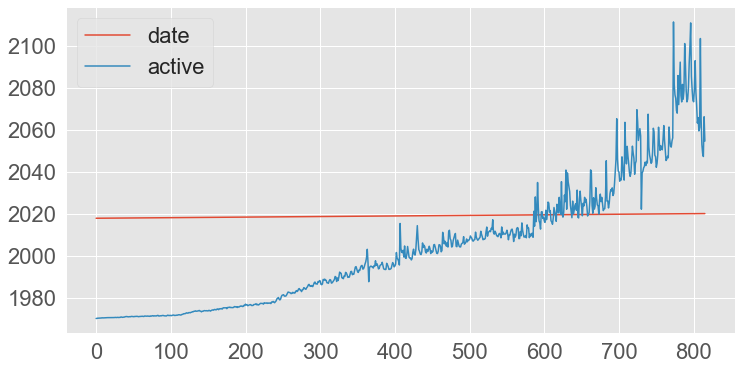

In [153]:
df2_train.plot(figsize=(12,6))

In [154]:
df2_train.index = pd.to_datetime(df2_train.index, unit='s')

In [155]:
df2_train.date = pd.to_datetime(df2_train.date)

In [156]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(df2_train[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

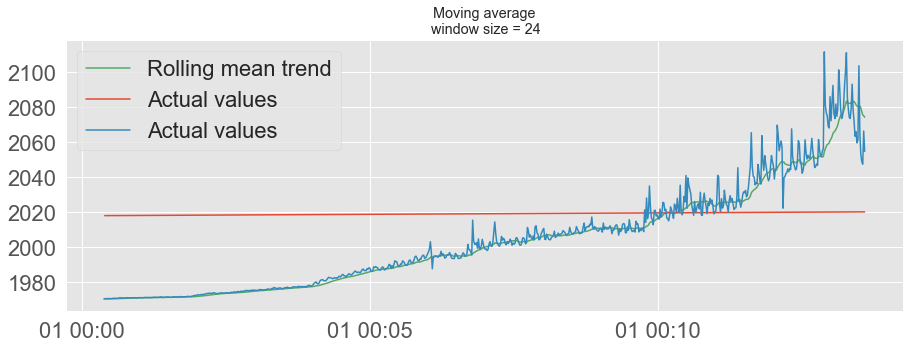

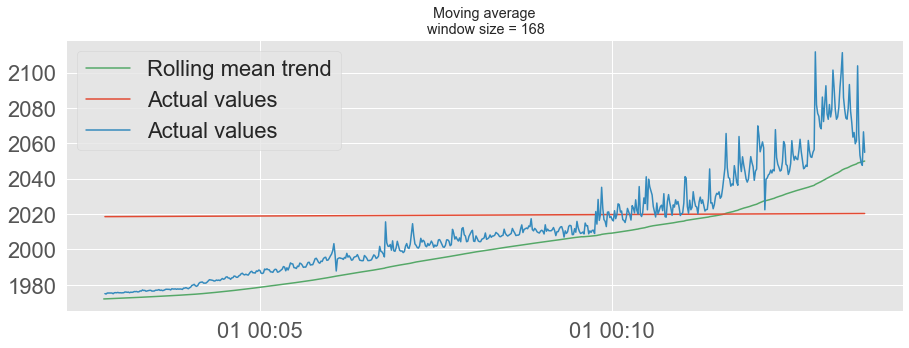

In [157]:
plotMovingAverage(df2_train, 24) # сглаживаем по дням
plotMovingAverage(df2_train, 24*7) # сглаживаем по неделям

In [139]:
df3 = pd.read_csv('/Users/admin/Documents/Find a job/Tests/mail ru/Данные_для_тестового_задания_аналитика_vkc/lifetime_dataset_for_prediction.csv',
                sep=';')

In [140]:
df3.head()

,id,os,date
0,0d206d1c-bf9e-401a-9cf4-d82ed2844794,Android,2020-03-19
1,0D206E13-99CA-4AB9-BC38-7F2B6DBBC4B6,iOS,2020-03-22
2,0D206E13-99CA-4AB9-BC38-7F2B6DBBC4B6,iOS,2020-03-23
3,0D206E13-99CA-4AB9-BC38-7F2B6DBBC4B6,iOS,2020-03-24
4,0D206E13-99CA-4AB9-BC38-7F2B6DBBC4B6,iOS,2020-03-27


In [158]:
df2_test = df3.groupby('date', as_index=False) \
    .agg({'id': 'count'}) \
    .rename(columns={'id': 'active'})

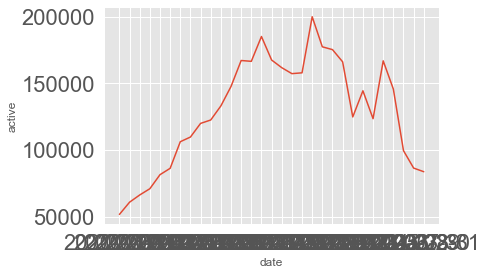

In [159]:
sns.lineplot(x = df2_test.date, y = df2_test.active);

In [160]:
df2_test.dtypes

date      object
active     int64
dtype: object

In [161]:
df2_test.date = pd.to_datetime(df2_test.date)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

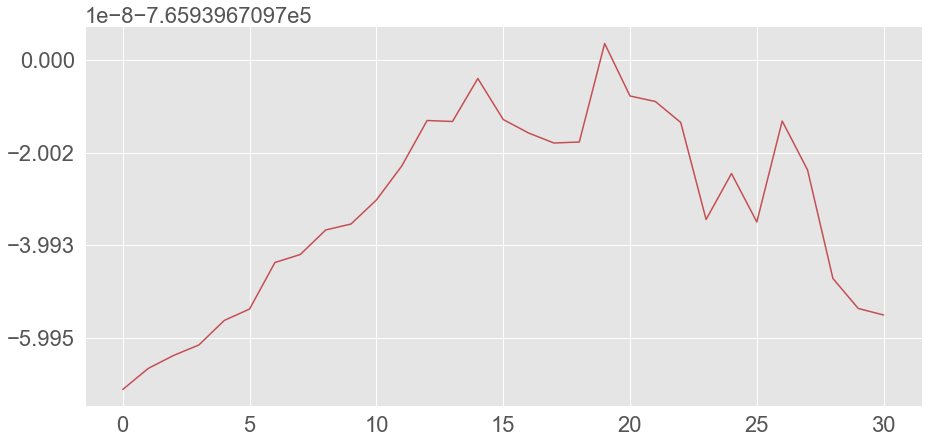

In [163]:
from sklearn.linear_model import LinearRegression



X_train = df2_train.date
y_train = df2_train.active
X_test = df2_test.date
y_test = X_test = df2_test.active

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
#X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)


lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} users".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True);

In [2]:
df1 = pd.read_csv('/Users/admin/Documents/Find a job/Tests/mail ru/Данные_для_тестового_задания_аналитика_vkc/dataset_for_experiment_result.csv',
                sep=';')

In [3]:
df1.head()

,id,group_name,os,1_month_retention,revenue
0,11B84187-70D5-4FC6-9D0E-E62F0F7D409E,a,iOS,1,"0,9855125"
1,4c094e8e-645d-43c4-99f8-2a696925daa5,a,Android,0,"0,4927562"
2,58d8f0b9-62d6-42ed-b56e-4d80214031ea,a,Android,1,12
3,af87a45e-76b9-4ac7-bb49-e2d14814c96e,control,Android,0,0
4,AD9ED89E-B9E7-4532-A872-8D4F65CE37B5,control,iOS,1,0


In [4]:
df1.columns = ['id', 'group_name', 'os', 'month_retention_1', 'revenue']

In [5]:
df1.shape

(33872, 5)

In [6]:
df1.dtypes

id                   object
group_name           object
os                   object
month_retention_1     int64
revenue              object
dtype: object

In [7]:
df1['revenue'] = df1['revenue'].replace(",",".", regex=True).astype(float)

In [8]:
df1.dtypes

id                    object
group_name            object
os                    object
month_retention_1      int64
revenue              float64
dtype: object

In [9]:
df1_test = df1.groupby('id', as_index=False) \
    .agg({'revenue': 'sum', 'month_retention_1': 'mean'})

In [23]:
df1_test.head()

,id,revenue,month_retention_1
0,00003044-d7c4-4734-9d2f-9e50d5ce6a7d,15.000000,1
1,0000effd-4d00-46dc-8f0c-22c9c5e381df,0.500000,1
2,00039bcd-d6ee-46fb-bf91-11d10bdf8de0,20.000000,1
3,0004c819-3348-4cf1-8a3d-7447e35e1d72,3.258179,0
4,000728AB-086A-48CB-91ED-E0BBFAB15598,0.000000,1


In [24]:
df1.isnull().sum()

id                   0
group_name           0
os                   0
1_month_retention    0
revenue              0
dtype: int64

In [21]:
df1.describe()

,1_month_retention,revenue
count,33872.000000,33872.000000
mean,0.588037,4.172373
std,0.492196,18.205087
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.150000
75%,1.000000,1.124901
max,1.000000,1340.000000


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='month_retention_1', ylabel='Density'>

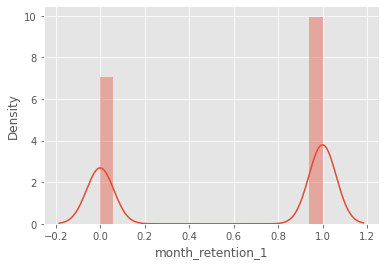

In [11]:
sns.distplot(df1_test['month_retention_1'])

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

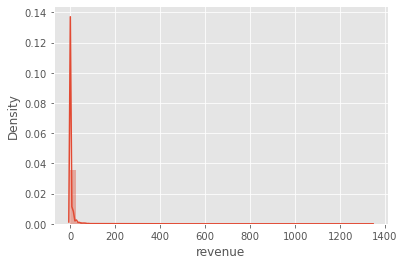

In [12]:
sns.distplot(df1_test.revenue)

In [15]:
df_exper_test = df1.query("group_name == 'a'")
df_exper_control = df1.query("group_name == 'control'")

In [17]:
df_exper_test

,id,group_name,os,month_retention_1,revenue
0,11B84187-70D5-4FC6-9D0E-E62F0F7D409E,a,iOS,1,0.985513
1,4c094e8e-645d-43c4-99f8-2a696925daa5,a,Android,0,0.492756
2,58d8f0b9-62d6-42ed-b56e-4d80214031ea,a,Android,1,12.000000
5,4f5c47ca-8a94-477c-a20d-790faea40369,a,Android,0,25.000000
8,59332154-4522-4444-8bb6-2aeb4bbd2039,a,Android,1,20.000000
...,...,...,...,...,...
33863,7e8b9457-ca98-4b85-970f-75e6affaff18,a,Android,1,0.000000
33865,6bd187d5-897e-44ad-9e23-553f2b1a1863,a,Android,0,0.000000
33866,2ee7b4b7-799a-4f50-8475-cf62dfb3345e,a,Android,0,0.678121
33870,49697103-bb7f-41a6-88ab-9a7a60a79ff1,a,Android,0,57.000000


In [55]:
df_exper_test.describe()

,1_month_retention,revenue
count,16934.000000,16934.000000
mean,0.590174,4.223915
std,0.491816,19.070485
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.093374
75%,1.000000,1.150000
max,1.000000,1211.898000


In [63]:
df_exper_control

,id,group_name,os,1_month_retention,revenue
3,af87a45e-76b9-4ac7-bb49-e2d14814c96e,control,Android,0,0.000000
4,AD9ED89E-B9E7-4532-A872-8D4F65CE37B5,control,iOS,1,0.000000
6,aecf1a5d-dee0-4e93-89be-e1438a03538d,control,Android,0,0.462687
7,fc295597-4d85-46ed-ba25-0edfbcd0d0e2,control,Android,0,0.000000
9,a24bdaad-eb44-4eed-9b7b-8a810dca9474,control,Android,0,0.000000
...,...,...,...,...,...
33861,f3111fdb-43be-4a1d-85f4-3aa8b7422a0d,control,Android,1,3.174708
33864,a5fdf634-0078-446d-9444-1be774dfefcc,control,Android,0,1.756399
33867,c2398ab0-fd09-4e7f-b93e-d2aa973193f7,control,Android,0,27.000000
33868,f82b01a1-4243-4873-ab3c-293449a46359,control,Android,0,5.000000


In [64]:
df_exper_control.describe()

,1_month_retention,revenue
count,16938.000000,16938.000000
mean,0.585902,4.120843
std,0.492580,17.297078
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.174601
75%,1.000000,1.110864
max,1.000000,1340.000000


In [119]:
df_exper_control.month_retention_1.sum()/df_exper_control.month_retention_1.count()*100

58.59015232022671

<AxesSubplot:xlabel='revenue', ylabel='Density'>

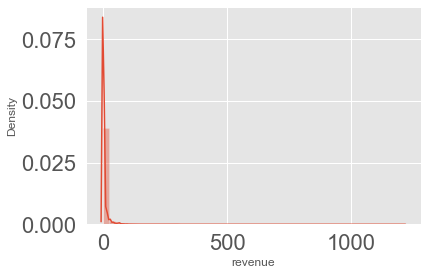

In [69]:
sns.distplot(df_exper_test.revenue)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

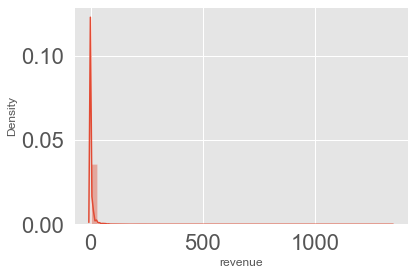

In [70]:
sns.distplot(df_exper_control.revenue)

In [89]:
def get_bootstrap_mean(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 10000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
    
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

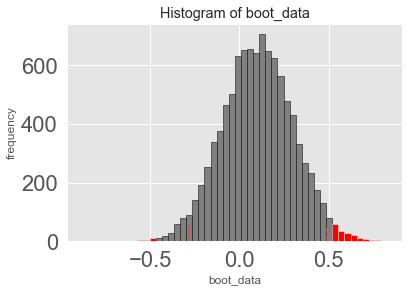

In [90]:
booted_data_mean = get_bootstrap_mean(df_exper_test.revenue, df_exper_control.revenue) 
# в результате хранится разница двух распределений, ДИ и pvalue

In [91]:
booted_data_mean["p_value"] # альфа

0.6038325047491238

In [92]:
booted_data_mean["quants"] # ДИ

,0
0.025,-0.283388
0.975,0.487658


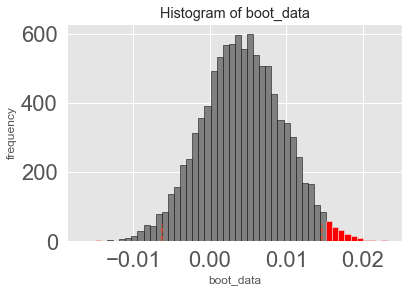

In [93]:
booted_data_mean_2 = get_bootstrap_mean(df_exper_test['1_month_retention'], df_exper_control['1_month_retention']) 
# в результате хранится разница двух распределений, ДИ и pvalue

In [94]:
booted_data_mean_2["p_value"] # альфа

0.4254748577679288

In [95]:
booted_data_mean_2["quants"] # ДИ

,0
0.025,-0.006201
0.975,0.014642


In [79]:
mannwhitneyu(df_exper_test.revenue, df_exper_control.revenue)

MannwhitneyuResult(statistic=142847657.5, pvalue=0.2507927079150486)

In [21]:
mannwhitneyu(df_exper_test.month_retention_1, df_exper_control.month_retention_1)

MannwhitneyuResult(statistic=142801368.0, pvalue=0.21222729383120198)

#### Визуально кажется, что у тестовой группы показатели выше, но исследование показало, что эти различия не статзначимые.